<a href="https://colab.research.google.com/github/RP-Lago/ML-with-PY/blob/main/ML_with_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando o DataFrame de amostra.

In [17]:
import pandas as pd

data = {'idade': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 22, 28, 33, 38, 42, 48, 52, 58, 62, 68],
        'renda': [50000, 60000, 80000, 90000, 120000, 95000, 110000, 150000, 140000, 160000, 30000, 45000, 75000, 85000, 100000, 105000, 115000, 130000, 145000, 155000],
        'target': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Salvar o DataFrame em um arquivo CSV (opcional)
df.to_csv('dados.csv', index=False)


# Mostrar DataFrame

In [ ]:
display(df.head())

# Use a biblioteca Pandas para carregar e limpar dados.

In [22]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('dados.csv')

# Exibindo as primeiras linhas
print(df.head())

# Verificando valores nulos
print(df.isnull().sum())

# Preenchendo valores nulos com a média
df.fillna(df.mean(), inplace=True)

   idade   renda  target
0     25   50000       0
1     30   60000       0
2     35   80000       1
3     40   90000       1
4     45  120000       1
idade     0
renda     0
target    0
dtype: int64


# Código para Gerar Gráficos:

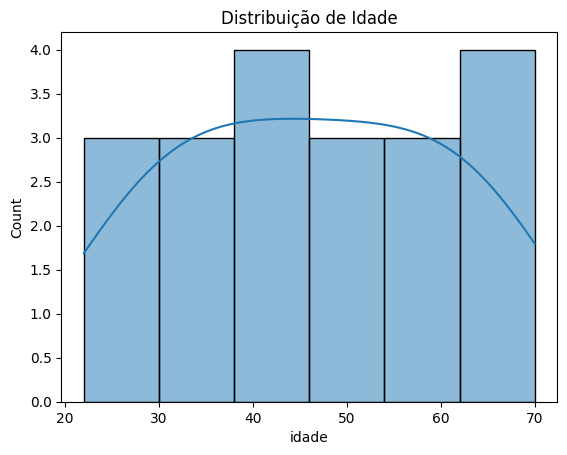

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Idade')
plt.show()

# Gráfico de dispersão

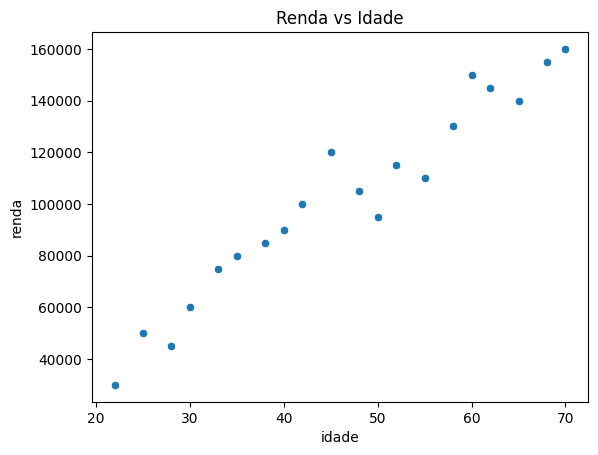

In [32]:
sns.scatterplot(x='idade', y='renda', data=df)
plt.title('Renda vs Idade')
plt.show()

# Exemplo prático: Classificação com Random Forest

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividindo os dados em treino e teste
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando a acurácia
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')

Acurácia: 0.75


# Código para validar precisão, recall e F1-score.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



# Código para Gerar a Matriz de Confusão:

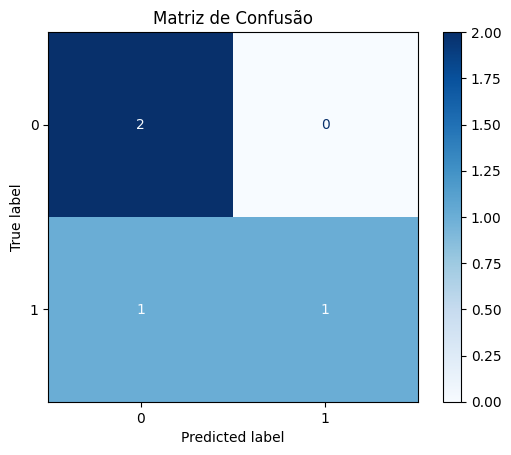

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Exemplo de Grid Search:



In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Melhores Parâmetros: {grid_search.best_params_}')

Melhores Parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
